本文按照线性回归的方法，通过 Python 计算结果，由于样本点是从指数函数中获取，因此在线性回归中无法获取很好的结果，后面通过对数线性回归进行计算，并得到了满意的结果。

完整的计算公式如下：

$
\omega = 
\frac{\sum_{i=1}^{m} y_i (x_i - \bar{x})}{\sum_{i=1}^{m} x_i^2 - \frac{1}{m} (\sum_{i=1}^{m} x_i)^2}
$

$
b = \frac{1}{m} \sum_{i=1}^{m}(y_i-\omega x_i)
$

首先计算下面内容

$
\sum_{i=1}^{m} y_i (x_i - \bar{x})
$

行向量：$\vec{y}=[y_1,y_2,...,y_m]$

列向量：$\vec{x}=[x_1,x_2,...,x_m]^T$


$\vec{X}=\vec{x}-\bar{x}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xi = [-2.,-1.5,-1.,-0.5,0.,0.5,1.,1.5,2.]
yi = [0.13533528,0.22313016,0.36787944,0.60653066,1.,1.64872127,
 2.71828183,4.48168907,7.3890561]

x_avg = np.average(xi)

xib = np.array(xi)
Xb = xib.reshape(9, 1) - x_avg
yb = np.array(yi)

r_numerator = yb@Xb

print(r_numerator)

[23.7667777]


然后计算下面内容

$
\sum_{i=1}^{m} x_i^2
$

In [4]:
xi2 = np.average(xib**2)

print(xi2)

1.6666666666666667


接着计算下面内容

$
\frac{1}{m} (\sum_{i=1}^{m} x_i)^2
$

In [5]:
tmp = 1/len(xi)*(np.sum(xib))**2

print(tmp)

0.0


最后计算$\omega$的值

$
\omega = 
\frac{\sum_{i=1}^{m} y_i (x_i - \bar{x})}{\sum_{i=1}^{m} x_i^2 - \frac{1}{m} (\sum_{i=1}^{m} x_i)^2}
$

In [6]:
w = r_numerator/(xi2-tmp)

print("w="+str(float(w)))

w=14.260066619999998


接着计算$b$的值

$
b = \frac{1}{m} \sum_{i=1}^{m}(y_i-\omega x_i)
$

In [7]:
y_x = np.sum(yb - w * xib)
b = 1/len(xi) * y_x

print("b="+str(float(b)))

b=2.0634026455555565


按照线性回归方法拟合的直线为：

$
y = \omega x + b
$

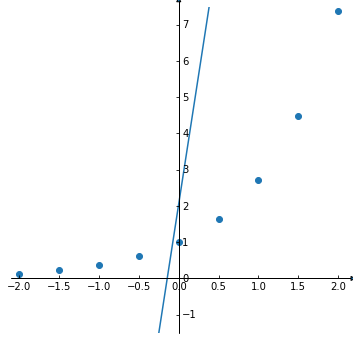

In [9]:
import mpl_toolkits.axisartist as axisartist

#创建画布
fig = plt.figure(figsize=(6,6))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111)  
#将绘图区对象添加到画布中
fig.add_axes(ax)

#通过set_visible方法设置绘图区所有坐标轴隐藏
ax.axis[:].set_visible(False)
#ax.new_floating_axis代表添加新的坐标轴
ax.axis["x"] = ax.new_floating_axis(0,0)
#给x坐标轴加上箭头
ax.axis["x"].set_axisline_style("-|>", size = 1.0)

ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)

#设置x、y轴上刻度显示方向
ax.axis["x"].set_axis_direction("bottom")
ax.axis["y"].set_axis_direction("right")

x = np.arange(-2, 2.1, 0.1)
y = w * x + b

x1 = np.arange(-2, 2.1, 0.5)
y1 = np.e**x1

#设置x、y坐标轴的范围
plt.xlim(-2.1,2.1)
plt.ylim(-1.5, 7.5)

plt.plot(x, y)
plt.scatter(x1, y1)
plt.show()

按照对数线性回归方法拟合的直线为：

$
y'=e^{\omega x + b}
$

$
\ln{y'}=y
$

$
y = \omega x + b
$

所以需要对原始数据处理，将$y$的值都取对数。直接通过 sklearn 计算获取。

In [11]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

yln = np.log(yb)

print(xib)
print(yln)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[-2.00000002 -1.5        -1.         -0.5         0.          0.5
  1.          1.5         2.        ]


In [12]:
linreg = LinearRegression()
linreg.fit(xib.reshape(len(xib),1), yln.reshape(len(xib),1))
print("w="+str(linreg.coef_))
print("b="+str(linreg.intercept_))

w=[[1.]]
b=[-3.00885859e-09]


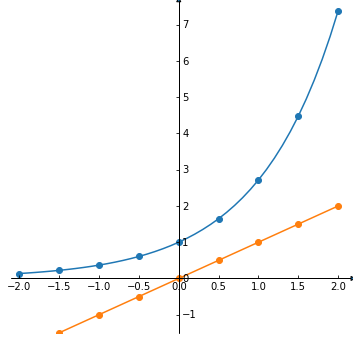

In [13]:
#创建画布
fig = plt.figure(figsize=(6,6))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111)  
#将绘图区对象添加到画布中
fig.add_axes(ax)

#通过set_visible方法设置绘图区所有坐标轴隐藏
ax.axis[:].set_visible(False)
#ax.new_floating_axis代表添加新的坐标轴
ax.axis["x"] = ax.new_floating_axis(0,0)
#给x坐标轴加上箭头
ax.axis["x"].set_axisline_style("-|>", size = 1.0)

ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)

#设置x、y轴上刻度显示方向
ax.axis["x"].set_axis_direction("bottom")
ax.axis["y"].set_axis_direction("right")

x = np.arange(-2, 2.1, 0.1)
y = x

ye = np.e ** (x)

x1 = np.arange(-2, 2.1, 0.5)
y1 = np.e**x1

#设置x、y坐标轴的范围
plt.xlim(-2.1,2.1)
plt.ylim(-1.5, 7.5)

plt.plot(x, ye)
plt.plot(x, y)
plt.scatter(x1, y1)
plt.scatter(x1, list(yln))
plt.show()